In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [52]:
dataset = pd.read_csv('kc_house_data.csv')

In [53]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [25]:
dataset['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


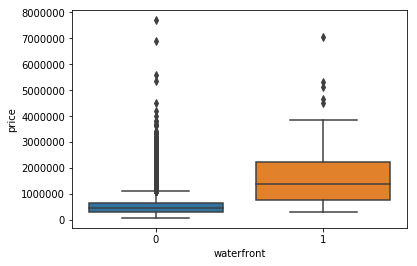

In [27]:
ax = sns.boxplot(x="waterfront", y="price", data=dataset)

In [62]:
dataset.head()
dataset.columns 
y=dataset['price']
X = dataset[['sqft_living']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict( X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))
lm.score(X_test,y_test)

0.5038612576799917


0.5038612576799917

In [63]:
dataset.head()
dataset.columns 
y=dataset['price']
X = dataset[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict( X_test)

In [64]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))
lm.score(X_test,y_test)

0.6660611912349232


0.6660611912349232

In [65]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

r2 = r2_score(y_train,y_poly_pred)
print(r2)

0.7466013283916599


In [66]:
import numpy
features=numpy.array(dataset)[:,3:]
Y=numpy.array(dataset)[:,2]

from sklearn.model_selection import train_test_split
features_train, features_test, Y_train, Y_test =(train_test_split(features, Y, test_size=0.20))
                       
Reg = linear_model.RidgeCV(alphas=[0.1])
Reg=Reg.fit(features_train,Y_train)
predicted_Y=Reg.predict(features_test)

from sklearn.metrics import r2_score
print(r2_score(Y_test,predicted_Y))

0.6739172980236129


In [68]:
import numpy
features=numpy.array(dataset)[:,3:]
Y=numpy.array(dataset)[:,2]

from sklearn.model_selection import train_test_split
features_train, features_test, Y_train, Y_test =(train_test_split(features, Y, test_size=0.20))
 
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(features_train)
X_poly = polynomial_features.fit_transform(features_test)
                     
Reg = linear_model.RidgeCV(alphas=[0.1])
Reg=Reg.fit(x_poly,Y_train)
predicted_Y=Reg.predict(X_poly)

from sklearn.metrics import r2_score
print(r2_score(Y_test,predicted_Y))

-9.370113242858023e+19
